Consider a particle far from the hole with speed $v$ and impact parameter $b$ which is the minimum distance between the centre of the hole and the undeflected path that the particle would follow in the absence of the hole. For given $v$ there is a critical value of $b$, say $b_{\text{crit}}$, such that particles with $b < b_{\text{crit}}$ are captured, while particles with $b > b_{\text{crit}}$ are not. The cross-section is defined by $\sigma(v) = \pi b_{\text{crit}}^2$.

The conserved energy per unit mass $E$ is related to the velocity $v$ by the Lorentz factor
\begin{equation}
    E = \gamma = \frac{1}{\sqrt{(1 - v^2)}}.
\end{equation}
The impact parameter $b$ is related to the conserved energy $E$ and angular momentum $h$ by
\begin{equation}
    b = \frac{h}{vE}.
\end{equation}
A particle is captured if its energy is sufficient to overcome the effective potential barrier. The critical case occurs when the particle's energy $E$ is exactly equal to the peak of the potential, $V_{\text{eff}}(r^*)$, for a given angular momentum $h$. This peak corresponds to an unstable circular orbit. The relationships for the radius and energy of these unstable orbits are
\begin{equation}
    h^2 = \frac{r^2}{2r - 3}
    E^2 = \frac{2(r - 1)^2}{r(2r - 3)}.
\end{equation}

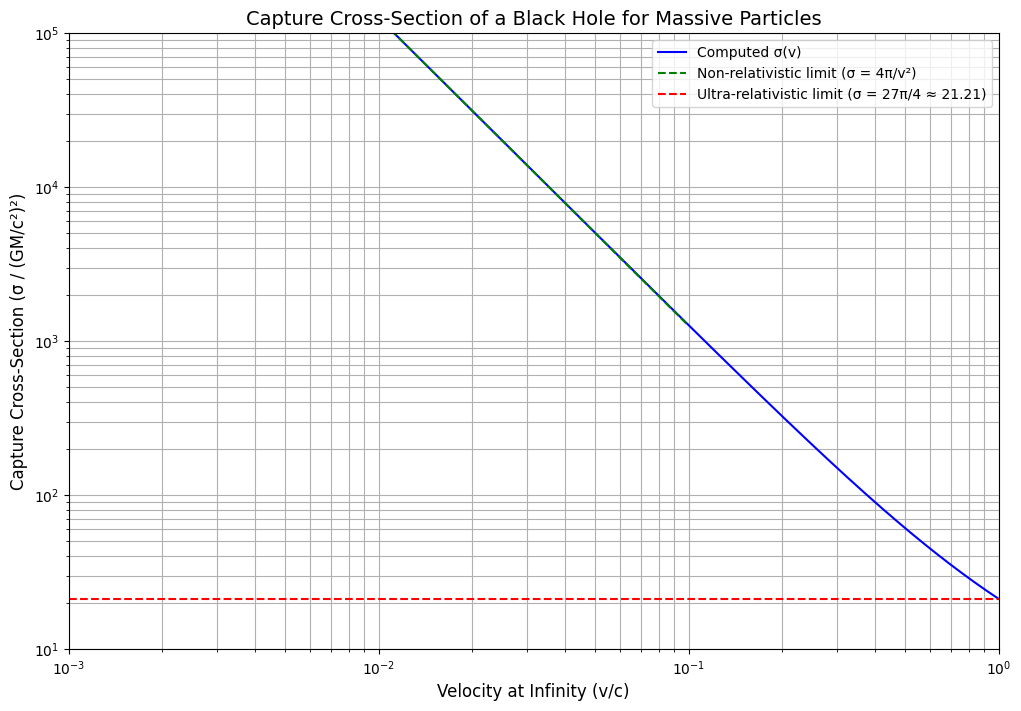

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

def calculate_sigma(v):
    '''
    Calculates the capture cross-section for a massive particle with velocity v at infinity.
    Args:
        v: The velocity of the particle at infinity (0 < v < 1).
    Returns:
        The capture cross-section, sigma.
    '''
    if v <= 0 or v >= 1:
        return np.nan

    # Calculate the conserved energy E from the velocity v
    E_sq = 1.0 / (1.0 - v**2)
    E = np.sqrt(E_sq)

    # Define a function whose root gives the critical angular momentum h_crit.
    # The critical condition is E^2 == V_peak^2(h). We find h that solves V_peak^2(h) - E^2 = 0.
    def residual(h):
        h_sq = h**2

        # Radius of the potential peak for a given h
        r_peak = h_sq - np.sqrt(h_sq**2 - 3*h_sq)

        # Height of the potential peak (V_eff^2) for that r and h
        V_peak_sq = (1.0 - 1.0/r_peak) * (1.0 + h_sq / r_peak**2)

        return V_peak_sq - E_sq

    # Find the critical angular momentum using a root finder.
    # The search interval for h is from the ISCO value (sqrt(3)) up to a large number.
    try:
        h_crit = brentq(residual, np.sqrt(3), 1000)
    except ValueError:
        return np.nan # If no root is found (e.g., for very low v requiring large h)

    # Calculate the critical impact parameter and the cross-section
    b_crit = h_crit / (v * E)
    sigma = np.pi * b_crit**2

    return sigma

# Generate a range of velocities, with more points at the low and high ends
v_values = np.concatenate([
    np.logspace(-3, -1, 100),
    np.linspace(0.1, 0.9, 100),
    np.linspace(0.9, 1, 100, endpoint=False)
])

sigmas = [calculate_sigma(v) for v in v_values]
plt.figure(figsize=(12, 8))
plt.plot(v_values, sigmas, 'b-', label='Computed σ(v)')

# Plot the theoretical limits
# Non-relativistic limit: sigma = 4*pi / v^2
v_low = np.logspace(-3, -1, 50)
sigma_low_v = 4 * np.pi / v_low**2
plt.plot(v_low, sigma_low_v, 'g--', label='Non-relativistic limit (σ = 4π/v²)')

# Ultra-relativistic limit (photon capture): sigma = 27*pi / 4
sigma_high_v = 27 * np.pi / 4
plt.axhline(sigma_high_v, color='r', linestyle='--', label=f'Ultra-relativistic limit (σ = 27π/4 ≈ {sigma_high_v:.2f})')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Velocity at Infinity (v/c)', fontsize=12)
plt.ylabel('Capture Cross-Section (σ / (GM/c²)²)', fontsize=12)
plt.title('Capture Cross-Section of a Black Hole for Massive Particles', fontsize=14)
plt.grid(True, which="both", ls="-")
plt.legend()
plt.xlim(1e-3, 1)
plt.ylim(10, 1e5)
plt.show()

For non-relativistic velocities $v \ll 1$, the cross section $\sigma$ is proportional to $v^{-2}$ and grows without bound as $v$ decreases. This is known as gravitational focusing - a slow-moving particle lingers in the vicinity of the black hole for a longer time, allowing the gravitational force a greater opportunity to bend its path. Consequently, even particles that have a large impact parameter are pulled in and captured. This leads to an enormous capture cross-section with theoretical limit $\sigma(v) \approx 4\pi / v^2$.

For ultra-relativistic velocities $v \approx 1$, the cross section $\sigma$ asymptotically approaches the ultra-relativistic constant line. A particle moving near the speed of light behaves like a photon. Its high kinetic energy dominates its interaction with the black hole and it spends very little time in the strong-field region. Capture is determined by whether the trajectory intersects a critical region around the black hole known as the photon sphere. As $v \to 1$, the capture cross-section for a massive particle converges to the capture cross-section for a photon $\sigma(v) \to 27\pi / 4$.

To this end, consider a photon far from the hole that is directed towards it with impact parameter $b$. The path of a photon in the Schwarzschild metric is governed by the equation of motion
\begin{equation}
    \frac{d^2u}{d\phi^2} + u = \frac{3u^2}{2},
\end{equation}
where $u = 1/r$. The total deflection angle $\alpha$, can be found by integrating the change in angle from infinity to the point of closest approach $r_{\min}$ or $u_{\max}$ and subtracting the angle for a straight path $\pi$. We have
\begin{equation}
    \alpha = 2 \int_{r_{\min}}^\infty \frac{d\phi}{dr} \,dr - \pi = 2 ∫_0^{u_{\max}} \frac{b}{\sqrt{1 - b^2u^2 + b^2u^3}} \,du - \pi.
\end{equation}
The upper limit of integration, $u_{\max}$, corresponds to the photon's closest approach and is the smaller positive real root of the cubic equation
\begin{equation}
    f(u) = b^2u^3 - b^2u^2 + 1 = 0.
\end{equation}
Taking the derivative with respect to $u$ and setting to zero,
\begin{equation}
    f'(u) = 3b^2u^2 - 2b^2u = 0
\end{equation}
we discover that minimums occur at $u = 0$ and $u = 2/3$, where $f''(2/3) = 2b^2 > 0$. At this minimum, $f(2/3) = 1 - \frac{4}{27}b^2$, so positive real roots only exist only for $b \geq 3\sqrt{3}/2 = b_{\text{crit}}$.


In [42]:
import numpy as np
from scipy.integrate import quad

# Define the critical impact parameter for photon capture
b_crit = np.sqrt(27) / 2.0

def calculate_deflection_angle(b):
    """
    Computes the deflection angle for a photon with impact parameter b.

    Returns the angle in radians, or np.inf if the photon is captured.
    """
    if b <= b_crit:
        return np.inf

    # Coefficients of the cubic polynomial b^2*u^3 - b^2*u^2 + 1 = 0
    coeffs = [b**2, -b**2, 0, 1]
    roots = np.roots(coeffs)

    # Filter for real, positive roots to find the turning point u_max
    real_positive_roots = [r.real for r in roots if np.isreal(r) and r.real > 0]

    # The point of closest approach, u_max, is the smaller of the two positive roots
    if len(real_positive_roots) < 2:
        return np.nan # Should not happen for b > b_crit

    u_max = np.min(real_positive_roots)

    # Define the integrand for the deflection angle calculation
    def integrand(u, b_param):
        denominator = np.sqrt(1 - b_param**2 * u**2 + b_param**2 * u**3)
        return b_param / denominator

    # Calculate the integral from u=0 (infinity) to u_max (closest approach)
    integral_part, error = quad(integrand, 0, u_max, args=(b,))

    # The total deflection angle is 2 * integral - pi
    deflection_angle_rad = 2 * integral_part - np.pi
    return deflection_angle_rad

print("Deflection for large impact parameters")
large_b_values = [10, 50, 100, 1000]
print(f"{'b':>10} {'Numerical Angle (rad)':>25} {'Approx. Angle (2/b)':>25} {'% Difference':>15}")
print("-" * 78)
for b_val in large_b_values:
    num_angle = calculate_deflection_angle(b_val)
    approx_angle = 2.0 / b_val
    diff = 100 * abs(num_angle - approx_angle) / approx_angle
    print(f"{b_val:10.1f} {num_angle:25.8f} {approx_angle:25.8f} {diff:14.4f}%")

print("\nDeflection for impact parameters close to the critical value")
specific_b_values = [3.2, 2.8, 2.65]
print(f"Critical impact parameter b_crit ≈ {b_crit:.4f}")
print(f"{'b':>10} {'Deflection Angle (rad)':>25} {'Deflection Angle (deg)':>25}")
print("-" * 63)
for b_val in specific_b_values:
    angle_rad = calculate_deflection_angle(b_val)
    angle_deg = np.rad2deg(angle_rad)
    print(f"{b_val:10.2f} {angle_rad:25.4f} {angle_deg:25.2f}")

print("\nThe Case of b = 2.5")
print(f"Deflection Angle = {np.rad2deg(calculate_deflection_angle(2.5))}")
print(f"The impact parameter b = {b_val} is LESS than the critical value b_crit ≈ {b_crit:.4f}.")
print("The photon does not scatter; it is captured by the black hole.")
print("The deflection angle is effectively infinite as the photon spirals into the event horizon.")

Deflection for large impact parameters
         b     Numerical Angle (rad)       Approx. Angle (2/b)    % Difference
------------------------------------------------------------------------------
      10.0                0.23613600                0.20000000        18.0680%
      50.0                0.04122254                0.04000000         3.0563%
     100.0                0.02029997                0.02000000         1.4998%
    1000.0                0.00200295                0.00200000         0.1475%

Deflection for impact parameters close to the critical value
Critical impact parameter b_crit ≈ 2.5981
         b    Deflection Angle (rad)    Deflection Angle (deg)
---------------------------------------------------------------
      3.20                    1.4094                     80.75
      2.80                    2.2991                    131.73
      2.65                    3.5579                    203.85

The Case of b = 2.5
Deflection Angle = inf
The impact parameter b 